In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

E:\Anaconda5.2\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('Google-Stock-Price-Prediction-Using-RNN---LSTM-master/GOOG.csv')
print(data.shape)
data.head()

(3809, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [3]:
data_training = data[data['Date'] < '2019-01-01'].copy()
data_test = data[data['Date'] > '2019-01-01'].copy()

In [4]:
print(data_training.shape, data_test.shape)

(3617, 7) (192, 7)


In [5]:
data_training = data_training.drop(['Date', 'Adj Close'], axis=1)
data_training.tail()

,Open,High,Low,Close,Volume
3612,973.900024,1003.539978,970.109985,976.219971,1590300
3613,989.010010,1040.000000,983.000000,1039.459961,2373300
3614,1017.150024,1043.890015,997.000000,1043.880005,2109800
3615,1049.619995,1055.560059,1033.099976,1037.079956,1414800
3616,1050.959961,1052.699951,1023.590027,1035.609985,1493300


In [6]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [7]:
X_train = []
y_train = []

In [9]:
data_training[0, 0]

0.00033029488966945797

In [11]:
## 取前60天的信息。预测第61天的信息
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60: i])
    y_train.append(data_training[i, 0])

In [19]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
print(X_train.shape)
print(y_train.shape)

(3557, 60, 5)
(3557,)


### Building LSTM 

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [23]:
regressior = Sequential()

regressior.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units=60, activation='relu', return_sequences=True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [24]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
unified_lstm (UnifiedLSTM)   (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
unified_lstm_1 (UnifiedLSTM) (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
unified_lstm_2 (UnifiedLSTM) (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
unified_lstm_3 (UnifiedLSTM) (None, 120)               9

In [25]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

In [26]:
regressior.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
3557/3557 [==============================] - 175s 49ms/sample - loss: 0.0064
Epoch 2/50
3557/3557 [==============================] - 169s 48ms/sample - loss: 0.0020
Epoch 3/50
3557/3557 [==============================] - 169s 47ms/sample - loss: 0.0019
Epoch 4/50
3557/3557 [==============================] - 169s 47ms/sample - loss: 0.0019
Epoch 5/50
3557/3557 [==============================] - 169s 47ms/sample - loss: 0.0014
Epoch 6/50
3557/3557 [==============================] - 168s 47ms/sample - loss: 0.0015
Epoch 7/50
3557/3557 [==============================] - 169s 47ms/sample - loss: 0.0014
Epoch 8/50
3557/3557 [==============================] - 169s 47ms/sample - loss: 0.0012
Epoch 9/50
3557/3557 [==============================] - 169s 48ms/sample - loss: 0.0011
Epoch 10/50
3557/3557 [==============================] - 169s 48ms/sample - loss: 0.0011
Epoch 11/50
3557/3557 [==============================] - 169s 48ms/sample - loss: 0.0012
Epoch 12/50
3557/3557 [=======

### Prepare test dataset 

In [30]:
data_test.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [50]:
past_60_days = data[data['Date'] < '2019-01-01'].tail(60)

In [65]:
df = past_60_days.append(data_test, ignore_index=True)
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head(10)

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700
5,1072.939941,1106.400024,1068.270020,1079.319946,2949000
6,1108.000000,1115.000000,1086.401978,1110.079956,2101300
7,1108.910034,1113.446045,1089.000000,1092.250000,1372400
8,1104.589966,1124.219971,1102.500000,1121.280029,1928500
9,1126.459961,1128.989990,1102.189941,1115.689941,1467200


In [66]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [0.93940683, 0.93712442, 0.93529076, 0.9247443 , 0.01947328],
       [0.92550693, 0.93064972, 0.92791493, 0.9339358 , 0.01954719],
       [0.93524016, 0.94894575, 0.95017564, 0.95130949, 0.01227612]])

In [67]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [69]:
print(len(X_test), len(y_test))

192 192


In [56]:
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

(192, 60, 5) (192,)


In [57]:
y_pred = regressior.predict(X_test)

In [58]:
scale = scaler.scale_[0]
scale

0.0008186051270046249

In [59]:
## 将预测值映射回原值
y_pred = y_pred / scale
y_test = y_test / scale

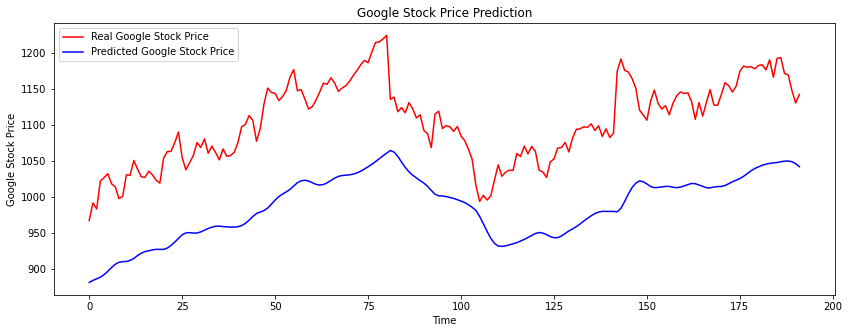

In [63]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
MinMaxScaler